# Linéarisation et équilibrage <BR> d'un arbre binaire de recherche

## Principe

La complexité des opérations sur un ABR est $\Theta(p)$ avec $p$ la profondeur du noeud cherché/ajouté/modifié/supprimé. 

Pour être efficace, l’arbre doit être suffisamment équilibré pour que sa hauteur soit de l’ordre de $\Theta(\log n)$. Trois approches sont possibles:

* équilibrage de tout l’arbre sur demande (ASD1) 


* re-équilibrage automatique lors de chaque modification (ASD2) 
    * AVL, rouge-noir, Andersson


* arbres parfaitement équilibrés par construction, mais à nombre de fils variable par noeud (ASD2) 
    * arbres 2-3, 2-3-4, B-arbres

Dans ce cours, nous voyons comment équilibrer a posteriori l'arbre vu précédemment

In [1]:
import include.helpers as h

In [2]:
class Noeud:
    def __init__(self,val):
        self.clef = val
        self.gauche = None
        self.droite = None   
    def __str__(self): 
        return "{}".format(self.clef)
    
def inserer(R,val):
    if R == None:      R = Noeud(val)      
    elif val < R.clef: R.gauche = inserer(R.gauche,val)    
    elif val > R.clef: R.droite = inserer(R.droite,val)
    else:              pass
    return R

La technique choisie consiste à modifier deux fois la structure de l'arbre

* Premièrement, le **linéariser** 
    * i.e. en faire un ABR dégénéré dont tous les enfants gauches sont absents. 
    * Il est alors équivalent à une liste simplement chainée triée.
    * on en profite pour compter le nombre d'éléments

* Deuxièmement, l'**arboriser**
    * i.e. transformer cette liste triée en arbre équilibré
    * la racine en est l'élément médian
    * le sous-arbre gauche la première partie de la liste
    * le sous-arbre droit le second partie

## Linéarisation

L'algorithme de linéarisation prend l'arbre `R` en entrée. En sortie, il 

* ré-organise l'ABR pour qu'il n'aie aucun enfant gauche
* en retourne la racine `L`
* compte le nombre d'éléments `n`

L'arbre réorganisé `L` est topologiquement équivalent à une liste simplement chainée. Le plus simple est donc d'y insérer les éléments en tête, et donc du plus grand au plus petit. 

Il faut donc effectuer un **parcours décroissant** de l'arbre `R`: `R.droite`, puis `R`, puis `R.gauche`

In [3]:
# Entrées: arbre de racine R
#          liste L en cours de création, 
#          nombre n d'éléments dans L  
# Sorties: L et n mis à jour par l'ajout de R et de ses descendants

def lineariser(R, L = None, n = 0):
    if R == None: return L, n

    L, n = lineariser(R.droite, L, n)
        
    R.droite = L   # ajouter R en tête de liste L
    L = R        
    n += 1
    
    L, n = lineariser(R.gauche, L, n)
    R.gauche = None
    
    return L, n

Voyons l'effet de cette fonction sur l'arbre suivant

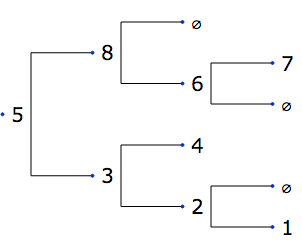

In [4]:
T = [ 5, 3, 2, 8, 6, 4, 1, 7 ]; R = None;
for t in T: R = inserer(R,t)
h.afficher_arbre_binaire(R)

In [5]:
L, n = lineariser(R.droite,None,0)

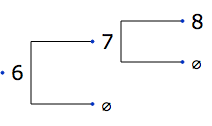

In [6]:
# L, n = lineariser(R.droite,None,0)
h.afficher_arbre_binaire(L)

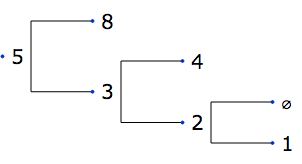

In [7]:
h.afficher_arbre_binaire(R)

In [8]:
R.droite = L; L = R; n += 1

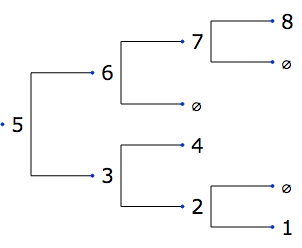

In [9]:
# R.droite = L; L = R; n += 1
h.afficher_arbre_binaire(R) 

In [10]:
L, n = lineariser(R.gauche, L, n); R.gauche = None

Il y a 8 éléments


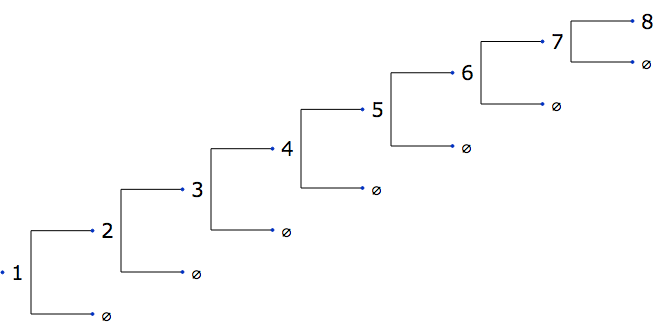

In [11]:
# L, n = lineariser(R.gauche, L, n); R.gauche = None
print("Il y a",n,"éléments")
h.afficher_arbre_binaire(L)

## Arborisation

L'algorithme d'arborisation prend en entrée

* l'ABR dégénéré `L` dont tous les enfants gauches sont absents
* le nombre `n` d'éléments de `L`

il le réorganise pour que 

* l'élément médian en devienne la racine
* le sous arbre gauche arborise la première partie de la liste
* le sous arbre droit arborise la seconde partie de la liste

Comme on ne peut parcourir la liste que dans l'ordre
* on arborise d'abord à droite, puis la racine, puis à gauche, comme dans un **parcours croissant**
* l'arborisation retourne la partie de la liste qu'elle n'a pas "consommée".

In [12]:
def arboriser(L,n):
    if n == 0: return None, L
        
    RG, L = arboriser(L,(n-1)//2)
    
    R = L
    R.gauche = RG
    L = L.droite
    
    R.droite , L = arboriser(L,n//2)
    return R, L

Visualisons le résultat sur notre arbre précédemment linéarisé

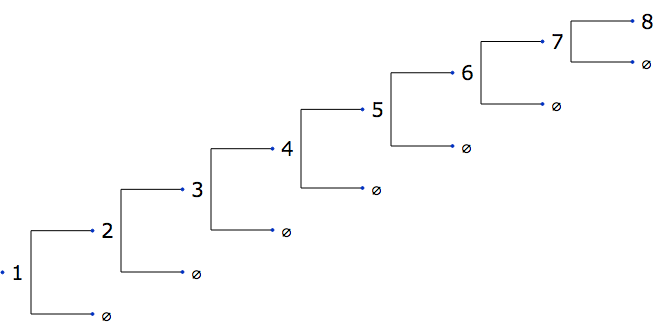

In [13]:
h.afficher_arbre_binaire(L)

In [14]:
RG , L = arboriser(L,(n-1)//2)

3


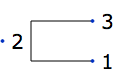

In [15]:
print((n-1)//2); h.afficher_arbre_binaire(RG)

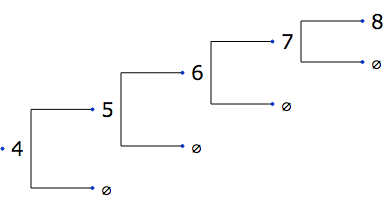

In [16]:
h.afficher_arbre_binaire(L)

In [17]:
R = L; R.gauche = RG; L = L.droite

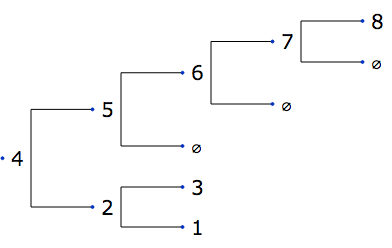

In [18]:
# R = L; R.gauche = RG; L = L.droite
h.afficher_arbre_binaire(R)
# L pointe vers l'élément de clef 5

In [19]:
R.droite , L = arboriser(L,n//2)

4


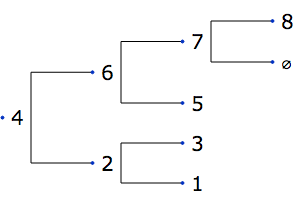

None


In [20]:
# R.droite , L = arboriser(L,n//2)
print(n//2)
h.afficher_arbre_binaire(R)
print(L)

## Equilibrage

L'opération d'équilibrage consiste simplement à réaliser linéarisation puis arborisation

In [21]:
def equilibrer(R):
    L, n = lineariser(R) 
    A, L = arboriser(L,n)
    return A

Visualisons-le sur un arbre semi-aléatoire

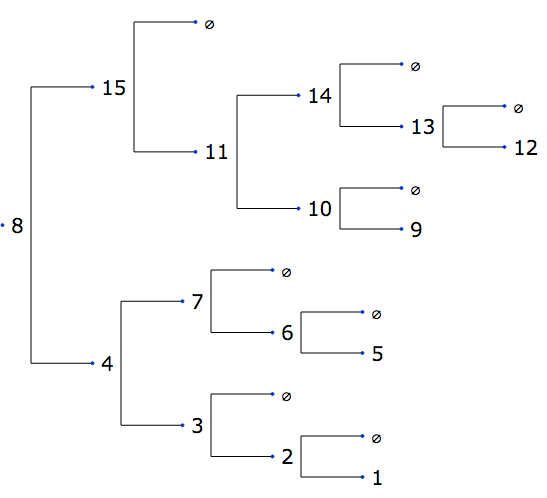

In [22]:
R = None
for t in range(15): R = inserer(R,1+(7+t*11)%15)
h.afficher_arbre_binaire(R)

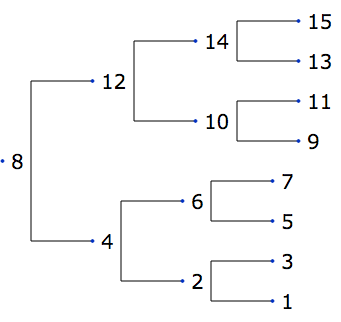

In [23]:
R = equilibrer(R)
h.afficher_arbre_binaire(R)

## Quand équilibrer ?

Il faut équilibrer l'arbre quand sa hauteur devient excessive.

Calculer la hauteur est opération de complexité $\Theta(n)$. Il est exclus de le faire à chaque opération.

Ce n'est pas nécessaire. L'opération d'insertion peut nous retourner la profondeur à laquelle elle a inséré l'élément. Si elle est excessive, il faut équilibrer. 

In [24]:
def inserer(R,val):
    H = 0
    if R == None:      R = Noeud(val);        
    elif val < R.clef: R.gauche, H = inserer(R.gauche,val)    
    elif val > R.clef: R.droite, H = inserer(R.droite,val)
    else:              pass
    return R, H + 1

Par exemple, si l'on veut limiter la profondeur à 3 fois le logarithme de la taille de l'arbre, on pourrait écrire

In [25]:
import numpy as np
R = None; tailleR = 0
for i in range(0,16):
    R, H = inserer(R,i); tailleR+= 1
    if H > 3 * np.log(tailleR):
        print("equilibrer @ i = ",i)
        R = equilibrer(R)

equilibrer @ i =  0
equilibrer @ i =  4
equilibrer @ i =  8
equilibrer @ i =  12


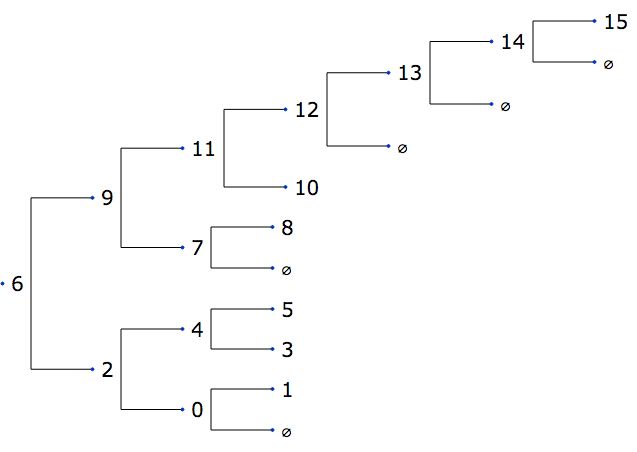

In [26]:
h.afficher_arbre_binaire(R)

En conclusion, **linéariser** un ABR

* le réorganise en ABR dégénéré sans enfant gauche
* sans créer ni effacer de noeuds
* compte le nombre de ses éléments
* effectue un parcours décroissant, de complexité $\Theta(n)$

**Arboriser** cet ABR dégénéré 

* le réorganise  en ABR équilibré
* dont la racine est l'élément médian, et récursivement
* sans créer ni effacer de noeuds
* effectue un parcours croissant, de complexité $\Theta(n)$

Les techniques que vous étudierez en ASD2 sont plus efficaces

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>